In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sales_data.csv')
data

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [3]:
data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [4]:
data.tail()

,date,product,category,price,quantity,revenue
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0
368,2022-12-31,Hoodie,Clothing,40.0,30.0,1200.0


In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [7]:
data = data.dropna(subset=['revenue'])

In [8]:
X = data.drop(['revenue', 'date'], axis=1)
y = data['revenue']

In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
X=X.fillna(0)

In [11]:
print(X.isnull().sum())
print(y.isnull().sum())

price                   0
quantity                0
day                     0
month                   0
year                    0
product_Coat            0
product_Headphones      0
product_Hoodie          0
product_Jeans           0
product_Laptop          0
product_Smartphone      0
product_Smartwatch      0
product_Sneakers        0
product_Speaker         0
product_T-Shirt         0
product_Tablet          0
product_Wallet          0
product_Watch           0
category_Bags           0
category_Bgas           0
category_Clohting       0
category_Clothing       0
category_Electronics    0
category_Shoes          0
category_Shoeses        0
dtype: int64
0


In [12]:
data=data[data['price'].notnull()]
data=data[data['quantity'].notnull()]

In [13]:
data = data[data['revenue'].notnull()]

In [14]:
X = X[~y.isnull()]
y = y[~y.isnull()]

In [15]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)

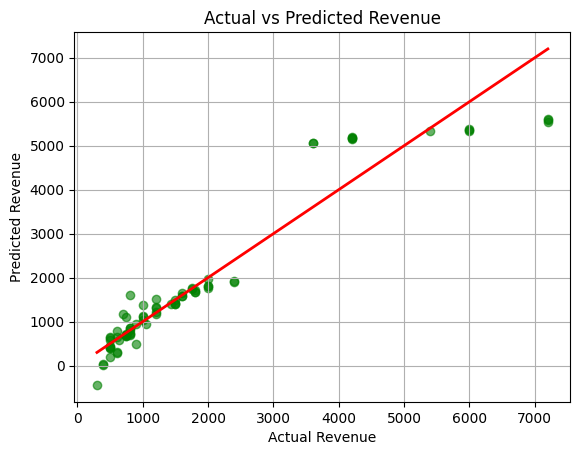

In [17]:
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.grid(True)
plt.show()

# Graphical and tabular forecasts for upcoming sales periods.

In [18]:
results = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})

results.reset_index(drop=True, inplace=True)

print("Tabular Forecast (first 10 rows):")
print(results.head(10))

Tabular Forecast (first 10 rows):
   Actual Sales  Predicted Sales
0        1200.0      1341.331185
1         700.0      1168.493369
2        1200.0      1306.194624
3        1000.0      1129.384002
4        2000.0      1762.117403
5         900.0       944.207114
6        3600.0      5051.021868
7         500.0       592.320792
8        6000.0      5379.629175
9        2400.0      1919.249567


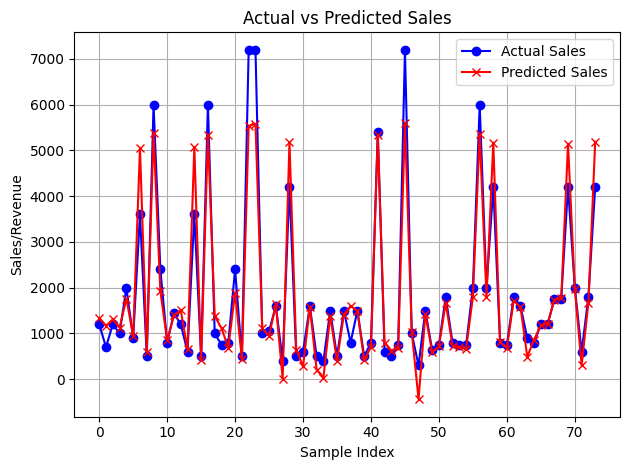

In [19]:
plt.plot(results['Actual Sales'], label='Actual Sales', marker='o', color='blue')
plt.plot(results['Predicted Sales'], label='Predicted Sales', marker='x', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales/Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()